# Bellabeat Case Study

## Introduction
Bellabeat is a high-tech manufacturer of health-focused products for women. It is a successful small company, but they have the potential to become a larger player in the global smart device market.<br>
The goal of this project is to analyze smart device data to gain insight into how consumers are using their smart devices.<br>
<br>
Dataset: [FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit)<br>
This Kaggle dataset contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.<br>
<br>
Source: [Coursera](https://www.coursera.org/learn/google-data-analytics-capstone/supplement/ZsmDD/case-study-2-how-can-a-wellness-company-play-it-smart)

## Examining Dataset

-- Count the number of IDs in each table<br>
<br>
SELECT<br>
COUNT(DISTINCT Id)<br>
FROM<br>
`bellabeat-405622.fitbit.dailyActivity_merged`<br>
<br>
<br>
-- Check if dailySteps_merged is needed<br>
<br>
SELECT<br>
dailyActivity.Id,<br>
ActivityDate<br>
FROM<br>
`bellabeat-405622.bellabeat.dailyActivity_merged` AS dailyActivity<br>
INNER JOIN<br>
`bellabeat-405622.bellabeat.dailySteps_merged` AS dailySteps<br>
ON<br>
dailyActivity.Id = dailySteps.Id<br>
AND<br>
dailyActivity.ActivityDate = dailySteps.ActivityDay<br>
WHERE<br>
TotalSteps <> StepTotal<br>
<br>

-- Data cleaning<br>
SleepDay column in sleepDay_merged is divided into SleepDay and SleepTime columns by using the following formulas on Google Sheets<br>
  =LEFT(B2,FIND(" ",B2)-1)<br>
  =RIGHT(B2,LEN(B2)-FIND(" ",B2))<br>
*/<br>
<br>

-- A relationship between activitiy level and calories<br>
<br>
SELECT<br>
  Id,<br>
  ActivityDate,<br>
  Calories,<br>
  TotalSteps,<br>
  TotalDistance,<br>
  (VeryActiveDistance+ModeratelyActiveDistance) AS TotalActiveDistance,<br>
  (VeryActiveMinutes+FairlyActiveMinutes) AS TotalActiveMinutes<br>
FROM<br>
  `bellabeat-405622.fitbit.dailyActivity_merged`<br>
ORDER BY<br>
  Calories DESC<br>
<br>


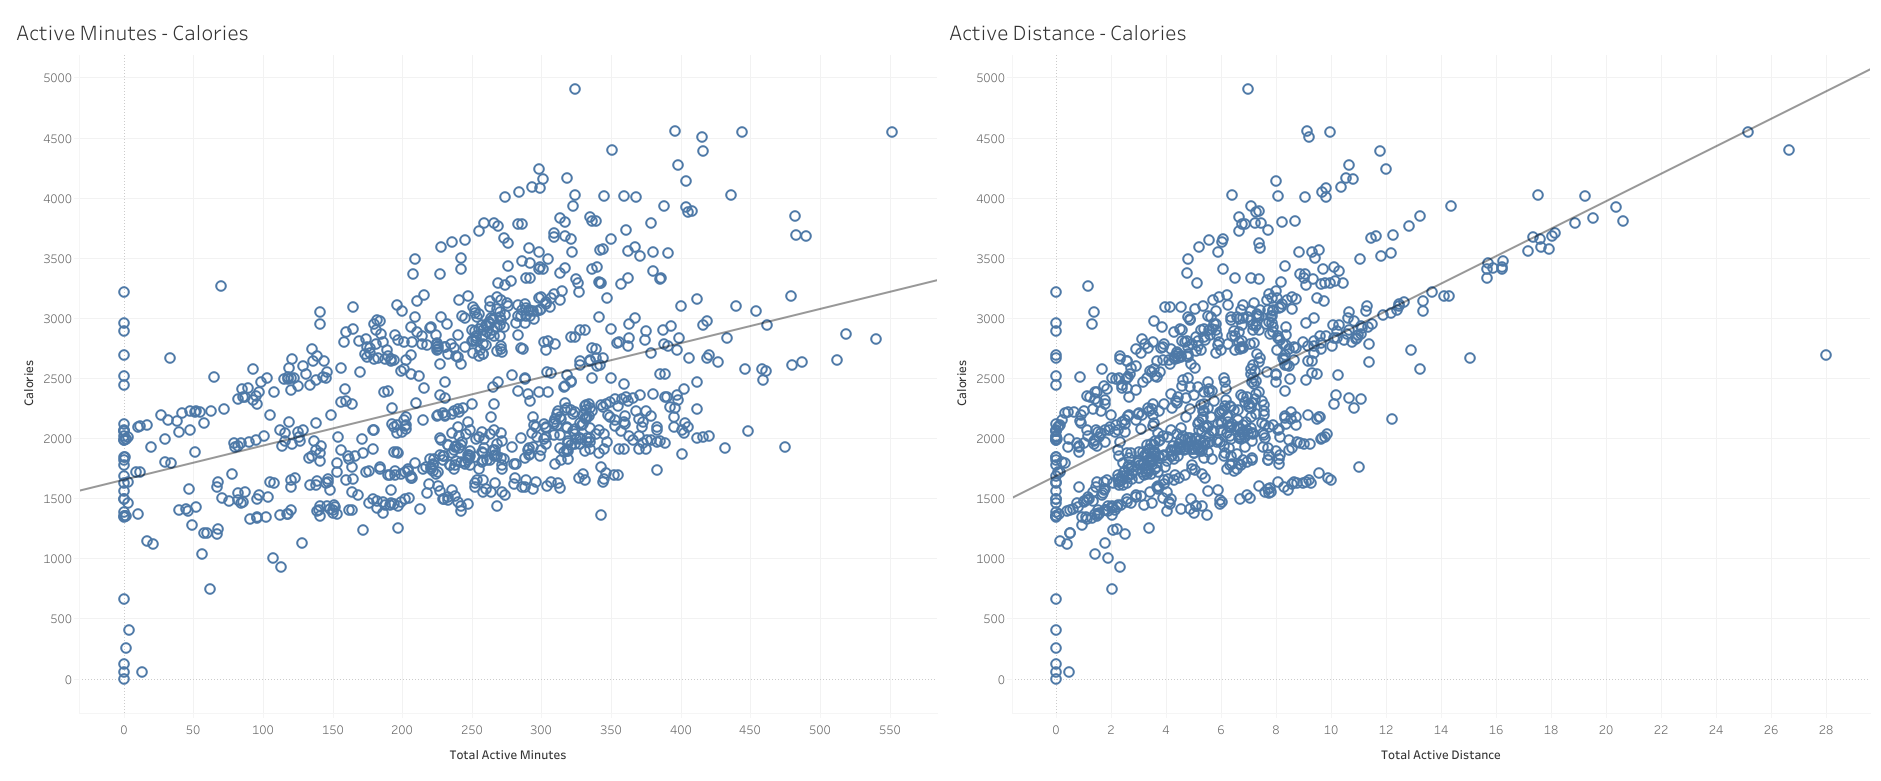
<br>

-- Combine columns from weightLogInfo_merged and sleepDay_merged tables into dailyActivity_merged table<br>
<br>
SELECT<br>
  dailyActivity.Id,<br>
  Calories,<br>
  WeightKg,<br>
  BMI,<br>
  ActivityDate,<br>
  TotalSteps,<br>
  TotalDistance,<br>
  VeryActiveDistance,<br>
  ModeratelyActiveDistance,<br>
  LightActiveDistance,<br>
  SedentaryActiveDistance,<br>
  VeryActiveMinutes,<br>
  FairlyActiveMinutes,<br>
  LightlyActiveMinutes,<br>
  SedentaryMinutes,<br>
  TotalMinutesAsleep,<br>
  TotalTimeInBed<br>
FROM<br>
  `bellabeat-405622.bellabeat.dailyActivity_merged` As dailyActivity<br>
LEFT JOIN<br>
  `bellabeat-405622.bellabeat.weightLogInfo_merged` AS weightLog<br>
  ON<br>
    dailyActivity.Id = weightLog.Id<br>
    AND<br>
    dailyActivity.ActivityDate = weightLog.Date<br>
LEFT JOIN<br>
   `bellabeat-405622.bellabeat.sleepDay_merged` AS sleepDay<br>
ON<br>
    dailyActivity.Id = sleepDay.Id<br>
    AND<br>
    dailyActivity.ActivityDate = sleepDay.SleepDay<br>
<br>

-- A relationship between activitiy level and sleep<br>
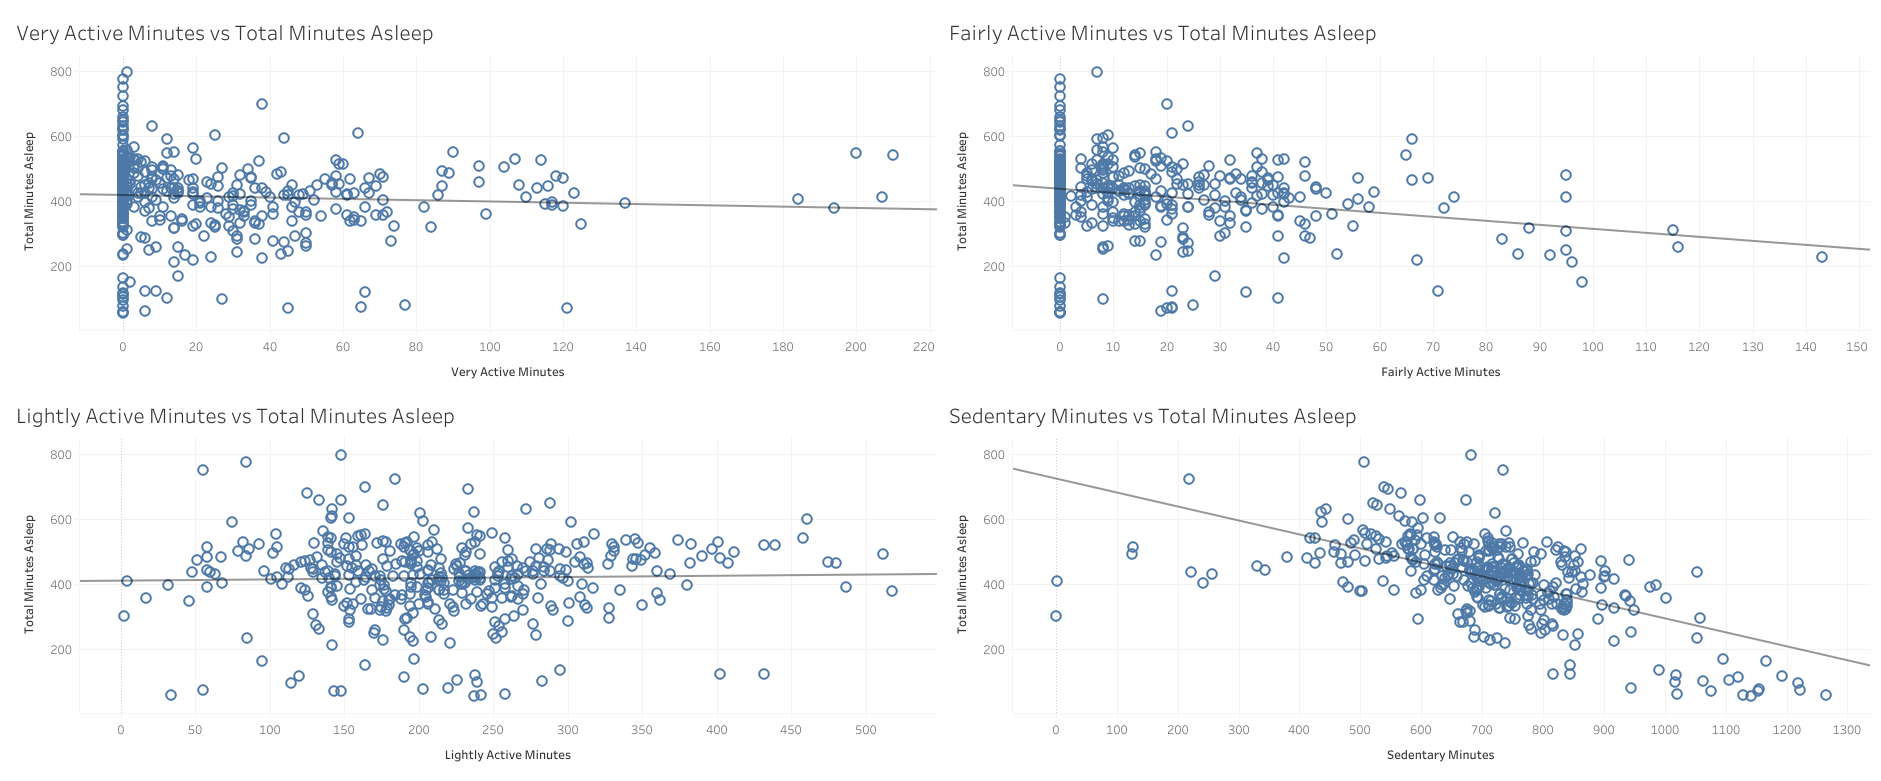<br>
<br>

-- A relationship between the hour of the day and activity intensity<br>
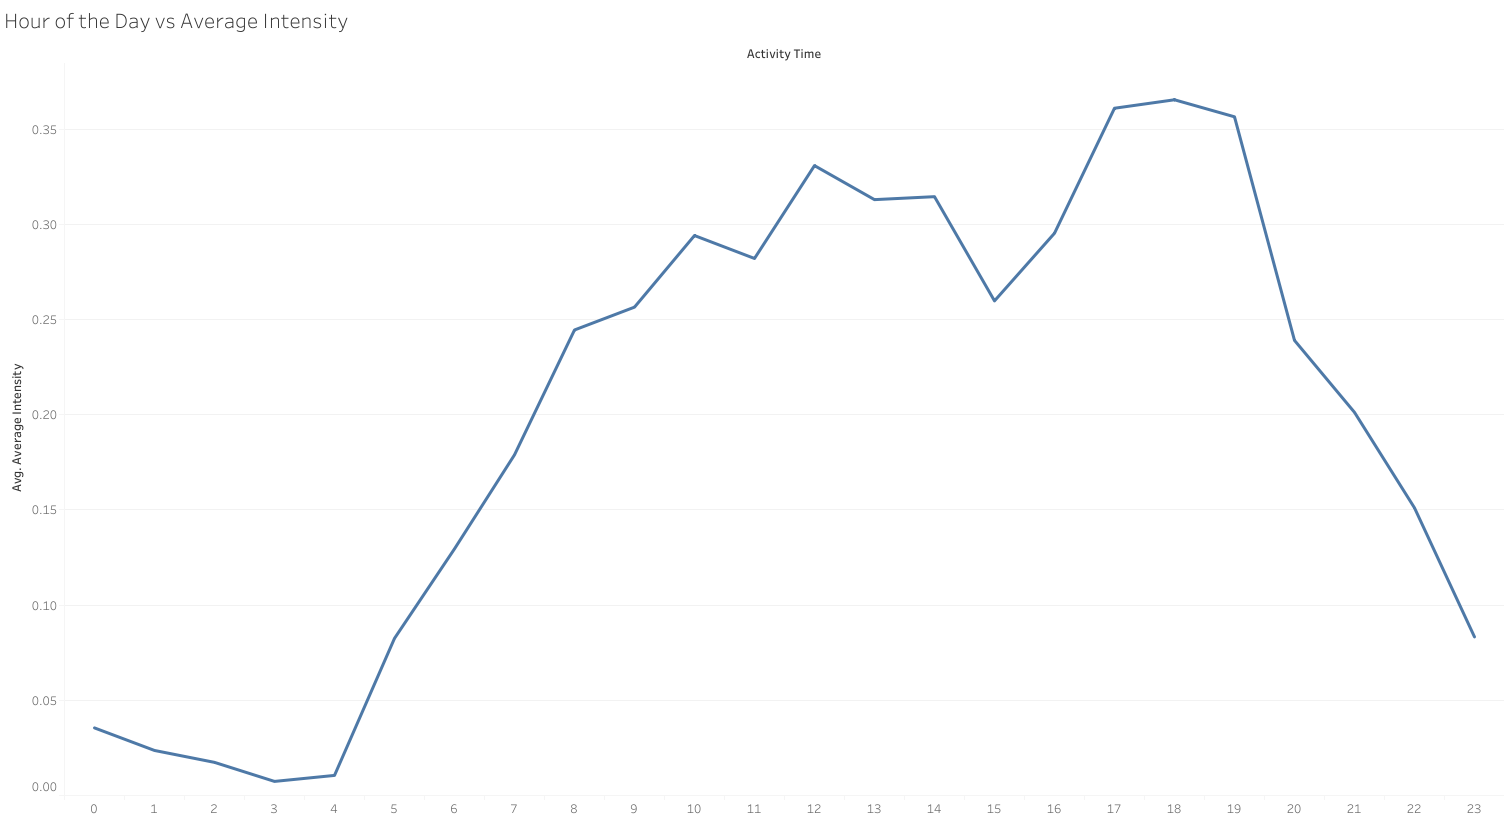<br>
<br>

-- The average minutes of each activity level<br>
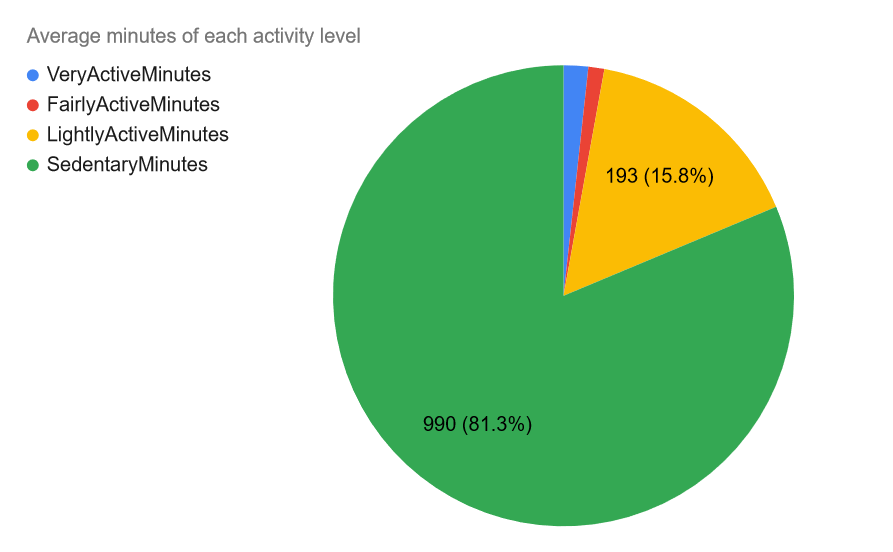<br>
<br>

## Findings
- The longer the users' active distance is, the more they burn calories
- The longer the users' have sedentary minutes, the shorter sleep time they have
- The activity intensity increases towards the middle of the day and peaks at 6 pm, and then decreases towards the midnight
- More than 80% of the time is recorded as sedentary minutes


## Recommendations
- Notify users how many sedentary minutes they have on the day so far to encourage them to be active
- Set a goal of active minutes and calories burned a day and let users know when they achieve it
- Based on the active minutes or calories burned, give users points that can be redeemed for the subscriptions or products